In [123]:
import pandas as pd
import numpy as np
import json
import xmltodict

import seaborn as sns
import matplotlib.pyplot as plt

## Read XML

In [124]:
with open('./data_source_xml/1.xml') as fd:
    doc = xmltodict.parse(fd.read())

df_xml1 = pd.DataFrame(doc['quiz'])
df_xml1

,question
0,"{'@type': 'ddmarker', 'name': {'text': 'Mainbo..."
1,"{'@type': 'ddwtos', 'name': {'text': 'jc-q18'}..."
2,"{'@type': 'matching', 'name': {'text': 'File E..."
3,"{'@type': 'matching', 'name': {'text': 'Hardwa..."
4,"{'@type': 'matching', 'name': {'text': 'Speed ..."
...,...
107,"{'@type': 'multichoice', 'name': {'text': 'Ope..."
108,"{'@type': 'multichoice', 'name': {'text': 'Ope..."
109,"{'@type': 'multichoice', 'name': {'text': 'RAM..."
110,"{'@type': 'multichoice', 'name': {'text': 'Typ..."


### Create Dataframe from XML file

In [125]:
columns_name = df_xml1['question'][0].keys()
# print(columns_name)

data = []
subject_xml1_df = pd.DataFrame(data, columns=columns_name)
# subject_xml1_df

In [126]:
for i in range(len(df_xml1)):
    subject_xml1_df.loc[i] = df_xml1['question'][i]

subject_xml1_df

,@type,name,questiontext,generalfeedback,defaultgrade,penalty,hidden,idnumber,correctfeedback,partiallycorrectfeedback,incorrectfeedback,shownumcorrect,file,drag,drop,tags
0,ddmarker,{'text': 'Mainboard-003'},"{'@format': 'html', 'text': '1.Question 1'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,"{'@name': 'computer-motherboard-500x500.jpg', ...","[{'no': '1', 'text': 'កន្លែង​ដាក់​ CPU', 'noof...","[{'no': '1', 'shape': 'rectangle', 'coords': '...","{'tag': [{'text': 'exam'}, {'text': 'L2'}, {'t..."
1,ddwtos,{'text': 'jc-q18'},"{'@format': 'html', 'text': '1.Question 2'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'exam'}, {'text': 'L1'}, {'t..."
2,matching,{'text': 'File Extensions-001'},"{'@format': 'html', 'text': '1.Question 3'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'l3'}, {'text': 'exam'}, {'t..."
3,matching,{'text': 'Hardware-001'},"{'@format': 'html', 'text': '1.Question 4'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'exam'}, {'text': 'Hardware'..."
4,matching,{'text': 'Speed Unit-001'},"{'@format': 'html', 'text': '1.Question 5'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'exam'}, {'text': 'L2'}, {'t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,multichoice,{'text': 'Operating system-005'},"{'@format': 'html', 'text': '1.Question 108'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'L1'}, {'text': 'Quiz'}]}"
108,multichoice,{'text': 'Operation System-007'},"{'@format': 'html', 'text': '1.Question 109'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'L1'}, {'text': 'Quiz'}]}"
109,multichoice,{'text': 'RAM-002'},"{'@format': 'html', 'text': '1.Question 110'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'Hardware'}, {'text': 'L1'},..."
110,multichoice,{'text': 'Type of computer-006'},"{'@format': 'html', 'text': '1.Question 111'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'L1'}, {'text': 'Quiz'}]}"


In [127]:
names = []
for i in range(len(subject_xml1_df)):
    names.append(subject_xml1_df['name'][i]['text'])

subject_xml1_df['name'] = names
subject_xml1_df

,@type,name,questiontext,generalfeedback,defaultgrade,penalty,hidden,idnumber,correctfeedback,partiallycorrectfeedback,incorrectfeedback,shownumcorrect,file,drag,drop,tags
0,ddmarker,Mainboard-003,"{'@format': 'html', 'text': '1.Question 1'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,"{'@name': 'computer-motherboard-500x500.jpg', ...","[{'no': '1', 'text': 'កន្លែង​ដាក់​ CPU', 'noof...","[{'no': '1', 'shape': 'rectangle', 'coords': '...","{'tag': [{'text': 'exam'}, {'text': 'L2'}, {'t..."
1,ddwtos,jc-q18,"{'@format': 'html', 'text': '1.Question 2'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'exam'}, {'text': 'L1'}, {'t..."
2,matching,File Extensions-001,"{'@format': 'html', 'text': '1.Question 3'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'l3'}, {'text': 'exam'}, {'t..."
3,matching,Hardware-001,"{'@format': 'html', 'text': '1.Question 4'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'exam'}, {'text': 'Hardware'..."
4,matching,Speed Unit-001,"{'@format': 'html', 'text': '1.Question 5'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'exam'}, {'text': 'L2'}, {'t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,multichoice,Operating system-005,"{'@format': 'html', 'text': '1.Question 108'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'L1'}, {'text': 'Quiz'}]}"
108,multichoice,Operation System-007,"{'@format': 'html', 'text': '1.Question 109'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'L1'}, {'text': 'Quiz'}]}"
109,multichoice,RAM-002,"{'@format': 'html', 'text': '1.Question 110'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'Hardware'}, {'text': 'L1'},..."
110,multichoice,Type of computer-006,"{'@format': 'html', 'text': '1.Question 111'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'L1'}, {'text': 'Quiz'}]}"


In [128]:
level = []
q_type = []
for i in range(len(subject_xml1_df)):
    level_object = str(subject_xml1_df['tags'][i]['tag'])

    if('l1' in level_object or 'L1' in level_object):
        level.append('l1')
    elif('l2' in level_object or 'L2' in level_object):
        level.append('l2')
    elif('l3' in level_object or 'L3' in level_object):
        level.append('l3')
    elif('pending' in level_object or 'Pending' in level_object):
        level.append('pending')
    else:
        level.append('reviewing')

    
    if('exam' in level_object or 'Exam' in level_object):
        q_type.append('exam')
    elif('quiz' in level_object or 'Quiz' in level_object):
        q_type.append('quiz')
    elif('pretest' in level_object or 'Pretest' in level_object):
        q_type.append('pretest')
    elif('pending' in level_object or 'Pending' in level_object):
        q_type.append('pending')
    elif('review' in level_object or 'Review' in level_object):
        q_type.append('review')
    else:
        q_type.append(None)

len(level)

112

In [129]:
subject_xml1_df['level'] = level
subject_xml1_df['q_type'] = q_type

# subject_xml1_df.to_excel('xml1.xlsx')
subject_xml1_df

,@type,name,questiontext,generalfeedback,defaultgrade,penalty,hidden,idnumber,correctfeedback,partiallycorrectfeedback,incorrectfeedback,shownumcorrect,file,drag,drop,tags,level,q_type
0,ddmarker,Mainboard-003,"{'@format': 'html', 'text': '1.Question 1'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,"{'@name': 'computer-motherboard-500x500.jpg', ...","[{'no': '1', 'text': 'កន្លែង​ដាក់​ CPU', 'noof...","[{'no': '1', 'shape': 'rectangle', 'coords': '...","{'tag': [{'text': 'exam'}, {'text': 'L2'}, {'t...",l2,exam
1,ddwtos,jc-q18,"{'@format': 'html', 'text': '1.Question 2'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'exam'}, {'text': 'L1'}, {'t...",l1,exam
2,matching,File Extensions-001,"{'@format': 'html', 'text': '1.Question 3'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'l3'}, {'text': 'exam'}, {'t...",l3,exam
3,matching,Hardware-001,"{'@format': 'html', 'text': '1.Question 4'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'exam'}, {'text': 'Hardware'...",l2,exam
4,matching,Speed Unit-001,"{'@format': 'html', 'text': '1.Question 5'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'exam'}, {'text': 'L2'}, {'t...",l2,exam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,multichoice,Operating system-005,"{'@format': 'html', 'text': '1.Question 108'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'L1'}, {'text': 'Quiz'}]}",l1,quiz
108,multichoice,Operation System-007,"{'@format': 'html', 'text': '1.Question 109'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'L1'}, {'text': 'Quiz'}]}",l1,quiz
109,multichoice,RAM-002,"{'@format': 'html', 'text': '1.Question 110'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'Hardware'}, {'text': 'L1'},...",l1,quiz
110,multichoice,Type of computer-006,"{'@format': 'html', 'text': '1.Question 111'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}","{'@format': 'html', 'text': None}",NaN,NaN,NaN,NaN,"{'tag': [{'text': 'L1'}, {'text': 'Quiz'}]}",l1,quiz


In [130]:
l1 = len(subject_xml1_df[subject_xml1_df['level'] == 'l1'])
l2 = len(subject_xml1_df[subject_xml1_df['level'] == 'l2'])
l3 = len(subject_xml1_df[subject_xml1_df['level'] == 'l3'])
pending = len(subject_xml1_df[subject_xml1_df['level'] == 'pending'])
review = len(subject_xml1_df[subject_xml1_df['level'] == 'reviewing'])

labels = subject_xml1_df['level'].unique().tolist()
labels

['l2', 'l1', 'l3', 'pending', 'reviewing']

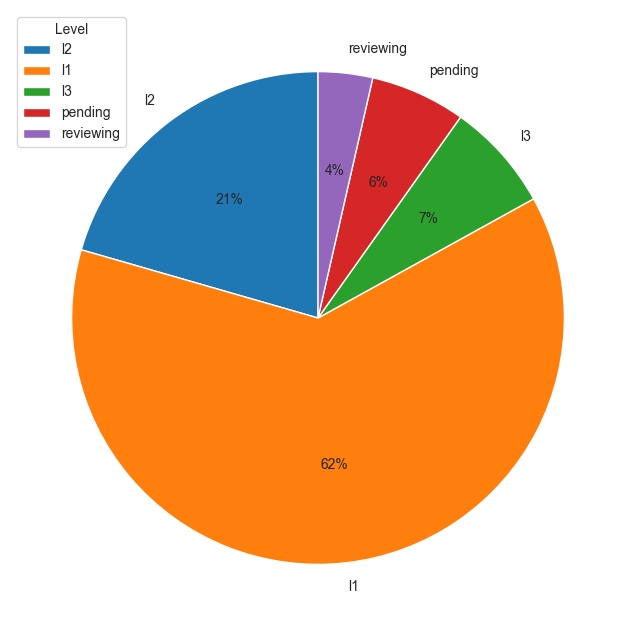

In [131]:
# Create an array of values
values = [l2, l1, l3, pending, review]

# Create a list of labels
labels = labels

# Create a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)

# Set the legend
plt.legend(title="Level", loc='upper left')

# Show the chart
plt.show()


## Read QuestionStats

In [132]:
df_q_state = pd.read_excel('./data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់/DSE-EXAM-ERA5-Senate-វិញ្ញាសាប្រឡង-questionstats.xlsx', sheet_name=1)
df_q_state.columns = df_q_state.columns.str.lower()
df_q_state.head(3)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81%,49.10%,NaN,1.00%,0.96%,24.23%,29.61%
1,2.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,57.99%,49.05%,NaN,1.00%,0.98%,25.71%,31.29%
2,3.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,54.70%,49.33%,NaN,1.00%,1.01%,27.04%,32.48%


In [133]:

facility_index_rate = []
for facility_index in df_q_state['facility index']:
    facility_index = facility_index[:-1]
    # print(facility_index)
    facility_index_rate.append(float(facility_index))

df_q_state['facility index'] = facility_index_rate
df_q_state.head(3)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81,49.10%,NaN,1.00%,0.96%,24.23%,29.61%
1,2.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,57.99,49.05%,NaN,1.00%,0.98%,25.71%,31.29%
2,3.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,54.70,49.33%,NaN,1.00%,1.01%,27.04%,32.48%


In [134]:
df_q_state.loc[df_q_state['facility index'] <= float(60), 'label_facility_index'] = 'l3'
df_q_state.loc[(df_q_state['facility index'] > float(60)) & (df_q_state['facility index'] <= float(80)), 'label_facility_index'] = 'l2'
df_q_state.loc[(df_q_state['facility index'] > float(80)) & (df_q_state['facility index'] <= float(100)), 'label_facility_index'] = 'l1'

df_q_state.head(3)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency,label_facility_index
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81,49.10%,NaN,1.00%,0.96%,24.23%,29.61%,l3
1,2.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,57.99,49.05%,NaN,1.00%,0.98%,25.71%,31.29%,l3
2,3.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,54.70,49.33%,NaN,1.00%,1.01%,27.04%,32.48%,l3


In [135]:
l1 = len(df_q_state[df_q_state['label_facility_index'] == 'l1'])
l2 = len(df_q_state[df_q_state['label_facility_index'] == 'l2'])
l3 = len(df_q_state[df_q_state['label_facility_index'] == 'l3'])

In [136]:
labels = df_q_state['label_facility_index'].unique().tolist()
labels

['l3', 'l2', 'l1']

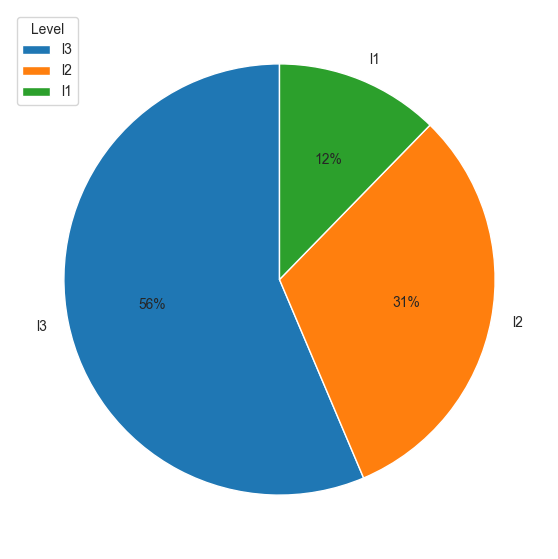

In [137]:
# Create an array of values
values = [l3, l2, l1]

# Create a list of labels
labels = labels

# Create a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)
# plt.pie(values, labels=labels)

# Set the legend
plt.legend(title="Level", loc='upper left')

# Show the chart
plt.show()
